<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>
국가 코드를 입력하세요(중국: 112 / 일본: 130 / 미국: 275) : 112
데이터를 몇 년부터 수집할까요? : 2017
데이터를 몇 년까지 수집할까요? : 2020
[2021-09-30 14:15:37.115404] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 112,
                    "natKorNm": "중  국",
                    "num": 565243,
                    "rnum": 1,
                    "ym": 201701
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
[ 중국_201701 : 565243 ]
----------------------------------------------------------------------
[2021-09-30 14:15:37.140344] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관

[2021-09-30 14:15:37.515335] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 112,
                    "natKorNm": "중  국",
                    "num": 370222,
                    "rnum": 1,
                    "ym": 201805
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
[ 중국_201805 : 370222 ]
----------------------------------------------------------------------
[2021-09-30 14:15:37.540264] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 112,
                    "natKorNm": "중  국",
                   

[2021-09-30 14:15:37.906917] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 112,
                    "natKorNm": "중  국",
                    "num": 541350,
                    "rnum": 1,
                    "ym": 201909
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
[ 중국_201909 : 541350 ]
----------------------------------------------------------------------
[2021-09-30 14:15:37.939832] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 112,
                    "natKorNm": "중  국",
                   

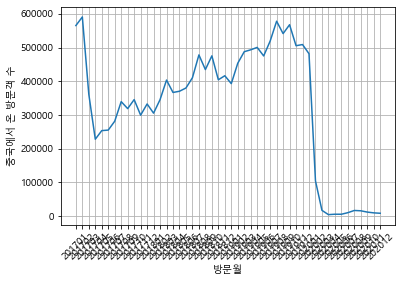

In [7]:
## 실습 예제 5-2

import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

## 그래프 그리기 ##
import matplotlib.pyplot as plt
import matplotlib
# import matplotlib import font_manager, rc
from matplotlib import font_manager,rc

ServiceKey="7YnFVBjCHXNlhnmbMUKjtVf2%2FRRuH3Z1m8AUq0DmDGi%2BYR2COSKoD9D0oOF6Jk7qbf00nLqJpyaXji4TKkYsrQ%3D%3D"

#[CODE 1]
def getRequestUrl(url):    
    req = urllib.request.Request(url)    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None


#[CODE 2]
def getTourismStatsItem(yyyymm, national_code, ed_cd):    
    service_url = "http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList"
    parameters = "?_type=json&serviceKey=" + ServiceKey   #인증키
    parameters += "&YM=" + yyyymm
    parameters += "&NAT_CD=" + national_code
    parameters += "&ED_CD=" + ed_cd
    url = service_url + parameters
    
    retData = getRequestUrl(url)   #[CODE 1]
    
    if (retData == None):
        return None
    else:
         return json.loads(retData)

#[CODE 3]
def getTourismStatsService(nat_cd, ed_cd, nStartYear, nEndYear):
    jsonResult = []
    result = []
    natName=''
    
    dataEND = "{0}{1:0>2}".format(str(nEndYear), str(12)) #데이터 끝 초기화
    isDataEnd = 0 #데이터 끝 확인용 flag 초기화    
    
    for year in range(nStartYear, nEndYear+1):        
        for month in range(1, 13):
            if(isDataEnd == 1): break #데이터 끝 flag 설정되어있으면 작업 중지.
            yyyymm = "{0}{1:0>2}".format(str(year), str(month))            
            jsonData = getTourismStatsItem(yyyymm, nat_cd, ed_cd) #[CODE 2]
            
            if (jsonData['response']['header']['resultMsg'] == 'OK'):               
                # 입력된 범위까지 수집하지 않았지만, 더이상 제공되는 데이터가 없는 마지막 항목인 경우 -------------------
                if jsonData['response']['body']['items'] == '': 
                    isDataEnd = 1 #데이터 끝 flag 설정
                    dataEND = "{0}{1:0>2}".format(str(year), str(month-1))
                    print("데이터 없음.... \n 제공되는 통계 데이터는 %s년 %s월까지입니다."%(str(year), str(month-1)))                    
                    break                
                #jsonData를 출력하여 확인......................................................
                print (json.dumps(jsonData, indent=4, sort_keys=True, ensure_ascii=False))          
                natName = jsonData['response']['body']['items']['item']['natKorNm']
                natName = natName.replace(' ', '')
                
                num = jsonData['response']['body']['items']['item']['num']
                
                ed = jsonData['response']['body']['items']['item']['ed']
                
                print('[ %s_%s : %s ]' %(natName, yyyymm, num))
                print('----------------------------------------------------------------------')                
                jsonResult.append({'nat_name': natName, 'nat_cd': nat_cd,'yyyymm': yyyymm, 'visit_cnt': num})
                result.append([natName, nat_cd, yyyymm, num])
                
    return (jsonResult, result, natName, ed, dataEND)

#[CODE 0]
def main():
    jsonResult = []
    result = []
    natName=''
    
    print("<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>")
    nat_cd = input('국가 코드를 입력하세요(중국: 112 / 일본: 130 / 미국: 275) : ')
    nStartYear =int(input('데이터를 몇 년부터 수집할까요? : '))
    nEndYear = int(input('데이터를 몇 년까지 수집할까요? : '))
    #E : 방한외래관광객, D : 해외 출국
    ed_cd = "E"
    
    jsonResult, result, natName, ed, dataEND =getTourismStatsService(nat_cd,ed_cd, nStartYear, nEndYear) #[CODE 3]

    if (natName=='') : #URL 요청은 성공하였지만, 데이터 제공이 안된 경우
        print('데이터가 전달되지 않았습니다. 공공데이터포털의 서비스 상태를 확인하기 바랍니다.')
    else:
        #파일저장 1 : json 파일       
        with open('./%s_%s_%d_%s.json' % (natName, ed, nStartYear, dataEND), 'w', encoding='utf8') as outfile:
            jsonFile  = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
            outfile.write(jsonFile)
        #파일저장 2 : csv 파일   
        columns = ["입국자국가", "국가코드", "입국연월", "입국자 수"]
        result_df = pd.DataFrame(result, columns = columns)
        result_df.to_csv('./%s_%s_%d_%s.csv' % (natName, ed, nStartYear, dataEND),index=False, encoding='cp949')
        
        visitCnt = []
        visitYM = []
        index = []
        i = 0
        
        for item in jsonResult:
            index.append(i)
            visitCnt.append(item['visit_cnt'])
            visitYM.append(item['yyyymm'])
            i+=1
            
        font_location = "C:/Windows/fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=font_location).get_name()
        matplotlib.rc("font",family=font_name)
        
        plt.xticks(index,visitYM)
        plt.plot(index,visitCnt)
        plt.xlabel("방문월")
        plt.xticks(rotation=45)
        plt.ylabel(natName+"에서 온 방문객 수")
        plt.grid(True)
        plt.show()

    
if __name__ == '__main__':
    main()


In [30]:
import urllib.request
service_url="http://openapi.tour.go.kr/openapi/service/TourismResourceStatsService/getPchrgTrrsrtVisitorList"
#parameters 생성하기
parameters = "?_type=json&serviceKey=xHru4wnHHGAMDByNJ78vlA2sbT%2BWifXKF%2FdgM0cWLeN83aA1kpJxk%2BvEUimg7Y59eL7FBuD%2BNvZ8O4Go%2FJbMTw%3D%3D"
parameters += "&YM=" + "201703"
parameters += "&SIDO=" + urllib.parse.quote("서울특별시")
parameters += "&GUNGU=" + urllib.parse.quote("종로구")
parameters += "&RES_NM=" + urllib.parse.quote("경복궁")
parameters += "&pageNo=" + "1"
parameters += "&numOfRows=" + "100"

url = service_url + parameters
req = urllib.request.Request(url)

#url open 요청 보내기 & 응답받기
response = urllib.request.urlopen(req)
decodeData = response.read().decode('utf-8')

# 응답받는 데이터 확인하기
import json
jsonData = json.loads(decodeData)
jsonData={'response':{'header':{'resultCode':'0000','resultMsg':'OK'},'body':{'items':{'item':{'addrCd':1111,'csForCnt':100061,'csNatCnt':165143,'gungu':'종로구','resNm':'경복궁','rnum':1,'sido':'서울특별시','ym':201703}},'numOfRows':100,'pageNo':1,'totalCount':1}}}

jsonData.keys()
jsonData['response'].keys()
jsonData['response']['body'].keys()

with open('D:\Documents\Jupyter_Workspace/TourData_경복궁.json','w',encoding='utf-8') as f:
    jsonFile = json.dumps(jsonData, indent=4, sort_keys=True, ensure_ascii=False)
    f.write(jsonFile)

In [31]:
import urllib.request
service_url="http://openapi.tour.go.kr/openapi/service/TourismResourceStatsService/getPchrgTrrsrtVisitorList"
#parameters 생성하기
parameters = "?_type=json&serviceKey=xHru4wnHHGAMDByNJ78vlA2sbT%2BWifXKF%2FdgM0cWLeN83aA1kpJxk%2BvEUimg7Y59eL7FBuD%2BNvZ8O4Go%2FJbMTw%3D%3D"
parameters += "&YM=" + "201703"
parameters += "&SIDO=" + urllib.parse.quote("서울특별시")
parameters += "&GUNGU=" + urllib.parse.quote("종로구")
parameters += "&RES_NM=" + urllib.parse.quote("경복궁")
parameters += "&pageNo=" + "1"
parameters += "&numOfRows=" + "100"

url = service_url + parameters
req = urllib.request.Request(url)

#url open 요청 보내기 & 응답받기
response = urllib.request.urlopen(req)
decodeData = response.read().decode('utf-8')

# 응답받는 데이터 확인하기
import json
jsonData = json.loads(decodeData)
jsonData={'response':{'header':{'resultCode':'0000','resultMsg':'OK'},'body':{'items':{'item':{'addrCd':1111,'csForCnt':100061,'csNatCnt':165143,'gungu':'종로구','resNm':'경복궁','rnum':1,'sido':'서울특별시','ym':201703}},'numOfRows':100,'pageNo':1,'totalCount':1}}}

jsonData.keys()
jsonData['response'].keys()
jsonData['response']['body'].keys()

with open('D:\Documents\Jupyter_Workspace/TourData_경복궁.json','w',encoding='utf-8') as f:
    jsonFile = json.dumps(jsonData, indent=4, sort_keys=True, ensure_ascii=False)
    f.write(jsonFile)
    
#두번째 테스트
parameters = "?_type=json&serviceKey=xHru4wnHHGAMDByNJ78vlA2sbT%2BWifXKF%2FdgM0cWLeN83aA1kpJxk%2BvEUimg7Y59eL7FBuD%2BNvZ8O4Go%2FJbMTw%3D%3D"
parameters += "&YM=" + "201703"
parameters += "&SIDO=" + urllib.parse.quote("서울특별시")
parameters += "&GUNGU=" + urllib.parse.quote("성북구")
parameters += "&RES_NM=" + urllib.parse.quote("경복궁")
parameters += "&pageNo=" + "1"
parameters += "&numOfRows=" + "100"

url = service_url + parameters
req = urllib.request.Request(url)

response = urllib.request.urlopen(req)
decodeData = response.read().decode('utf-8')

jsonData = json.loads(decodeData)
jsonData

{'response': {'header': {'responseTime': '2021-09-30T14:38:25.044+09:00',
   'resultCode': 22,
   'resultMsg': 'LIMITED NUMBER OF SERVICE REQUESTS EXCEEDS ERROR.'}}}

In [1]:
import os
import sys
import urllib.request
from datetime import datetime
import time
import json
import math

#[CODE 1]
def getRequestUrl(url):
    
    req = urllib.request.Request(url)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.now(), url))
        return None

#[CODE 2]
def getTourPointVisitor(yyyymm, sido, gungu, nPagenum, nItems):

    end_point = "http://openapi.tour.go.kr/openapi/service/TourismResourceStatsService/getPchrgTrrsrtVisitorList"                
    
    parameters = "?_type=json&serviceKey=" + "xHru4wnHHGAMDByNJ78vlA2sbT%2BWifXKF%2FdgM0cWLeN83aA1kpJxk%2BvEUimg7Y59eL7FBuD%2BNvZ8O4Go%2FJbMTw%3D%3D"                                          
    
    parameters += "&YM=" + yyyymm
    parameters += "&SIDO=" + urllib.parse.quote(sido)
    parameters += "&GUNGU=" + urllib.parse.quote(gungu)
    parameters += "&RES_NM=&pageNo=" + str(nPagenum)
    parameters += "&numOfRows=" + str(nItems)

    url = end_point + parameters
    
    retData = getRequestUrl(url) #[CODE 1] 호출 
    
    if (retData == None):
        return None
    else:
        return json.loads(retData)

#[CODE 3]
def getTourPointData(item, yyyymm, jsonResult):
    
    addrCd = 0 if 'addrCd' not in item.keys() else item['addrCd']
    gungu = '' if 'gungu' not in item.keys() else item['gungu']
    sido = '' if 'sido' not in item.keys() else item['sido']
    resNm = '' if 'resNm' not in item.keys() else item['resNm']
    rnum = 0 if 'rnum' not in item.keys() else item['rnum']
    ForNum = 0 if 'csForCnt' not in item.keys() else item['csForCnt']
    NatNum = 0 if 'csNatCnt' not in item.keys() else item['csNatCnt']
    
    jsonResult.append({'yyyymm': yyyymm, 'addrCd': addrCd,
                    'gungu': gungu, 'sido': sido, 'resNm': resNm, 
                    'rnum': rnum, 'ForNum': ForNum, 'NatNum': NatNum})
    return    

#[CODE 0]
def csWin_TourPoint():

    jsonResult = []

    sido = '서울특별시'
    gungu = ''
    nPagenum = 1
    nTotal = 0
    nItems = 100
    
    nStartYear = 2011
    nEndYear = datetime.today().year 

    for year in range(nStartYear, nEndYear+1):
        for month in range(1, 13):

            yyyymm = "{0}{1:0>2}".format(str(year), str(month))

            nPagenum = 1

            # 데이터 요청 및 항목 추출 작업 반복            
            while True:
                #[CODE 2] 호출 
                jsonData = getTourPointVisitor(yyyymm, sido, gungu, nPagenum, nItems)
    
                if (jsonData['response']['header']['resultMsg'] == 'OK'):
                    nTotal = jsonData['response']['body']['totalCount']
            
                    if nTotal == 0:
                        break

                    for item in jsonData['response']['body']['items']['item']:
                        getTourPointData(item, yyyymm, jsonResult)  #[CODE 3] 호출
                        
                    nPage = math.ceil(nTotal / 100)            
                    
                    if (nPagenum == nPage):
                        break

                    nPagenum += 1
                
                else:
                    break
    
    with open('./%s_관광지입장정보_%d_%d.json' % (sido, nStartYear, nEndYear), 'w', encoding='utf8') as outfile:
        retJson = json.dumps(jsonResult,
                        indent=4, sort_keys=True,
                        ensure_ascii=False)
        outfile.write(retJson)
        
    print ('%s_관광지입장정보_%d_%d.json SAVED' % (sido, nStartYear, nEndYear))            

    
if __name__ == '__main__':
    csWin_TourPoint()


[2021-09-30 13:21:08.922341] Url Request Success
[2021-09-30 13:21:16.430038] Url Request Success
[2021-09-30 13:21:26.476867] Url Request Success
[2021-09-30 13:21:37.392965] Url Request Success
[2021-09-30 13:21:51.473972] Url Request Success
[2021-09-30 13:22:03.326251] Url Request Success
[2021-09-30 13:22:18.300898] Url Request Success
[2021-09-30 13:22:32.090050] Url Request Success
[2021-09-30 13:22:47.452772] Url Request Success
[2021-09-30 13:23:00.880962] Url Request Success
[2021-09-30 13:23:12.472408] Url Request Success
[2021-09-30 13:23:25.622777] Url Request Success
[2021-09-30 13:23:36.616770] Url Request Success
[2021-09-30 13:23:48.301412] Url Request Success
[2021-09-30 13:23:59.992918] Url Request Success
[2021-09-30 13:24:13.380230] Url Request Success
[2021-09-30 13:24:27.104153] Url Request Success
[2021-09-30 13:24:40.926283] Url Request Success
[2021-09-30 13:24:54.838445] Url Request Success
[2021-09-30 13:25:09.193942] Url Request Success
[2021-09-30 13:25:23

In [5]:
from bs4 import BeautifulSoup
html = '<h1 id="title">한빛출판네트워크</h1><div class="top"><ul class="menu">menu"><li><a href=http://www.hanbit.co.kr/member/login.html class="login">로그인 </a></li></ul><ul class="brand"><li><a href="http://www.hanbit.co.kr/media/>한빛미디어<li><a href="http://www.hanbit.co.kr/academy/">한빛아카데미</a></li></ul></div>'
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<h1 id="title">
 한빛출판네트워크
</h1>
<div class="top">
 <ul class="menu">
  menu"&gt;
  <li>
   <a class="login" href="http://www.hanbit.co.kr/member/login.html">
    로그인
   </a>
  </li>
 </ul>
 <ul class="brand">
  <li>
   <a "="" academy="" href="http://www.hanbit.co.kr/media/&gt;한빛미디어&lt;li&gt;&lt;a href=" http:="" www.hanbit.co.kr="">
    한빛아카데미
   </a>
  </li>
 </ul>
</div>


In [10]:
soup.h1

<h1 id="title">한빛출판네트워크</h1>

In [11]:
tag_h1 = soup.h1
tag_h1

<h1 id="title">한빛출판네트워크</h1>

In [13]:
tag_div = soup.div
tag_div

<div class="top"><ul class="menu">menu"&gt;<li><a class="login" href="http://www.hanbit.co.kr/member/login.html">로그인 </a></li></ul><ul class="brand"><li><a "="" academy="" href="http://www.hanbit.co.kr/media/&gt;한빛미디어&lt;li&gt;&lt;a href=" http:="" www.hanbit.co.kr="">한빛아카데미</a></li></ul></div>

In [14]:
tag_ul = soup.ul
tag_ul

<ul class="menu">menu"&gt;<li><a class="login" href="http://www.hanbit.co.kr/member/login.html">로그인 </a></li></ul>

In [15]:
tag_li = soup.li
tag_li

<li><a class="login" href="http://www.hanbit.co.kr/member/login.html">로그인 </a></li>

In [16]:
tag_a = soup.a
tag_a

<a class="login" href="http://www.hanbit.co.kr/member/login.html">로그인 </a>

In [17]:
tag_ul_all = soup.find_all("ul")
tag_ul_all

[<ul class="menu">menu"&gt;<li><a class="login" href="http://www.hanbit.co.kr/member/login.html">로그인 </a></li></ul>,
 <ul class="brand"><li><a "="" academy="" href="http://www.hanbit.co.kr/media/&gt;한빛미디어&lt;li&gt;&lt;a href=" http:="" www.hanbit.co.kr="">한빛아카데미</a></li></ul>]

In [18]:
tag_li_all = soup.find_all("li")
tag_li_all

[<li><a class="login" href="http://www.hanbit.co.kr/member/login.html">로그인 </a></li>,
 <li><a "="" academy="" href="http://www.hanbit.co.kr/media/&gt;한빛미디어&lt;li&gt;&lt;a href=" http:="" www.hanbit.co.kr="">한빛아카데미</a></li>]

In [19]:
tag_a_all = soup.find_all("a")
tag_a_all

[<a class="login" href="http://www.hanbit.co.kr/member/login.html">로그인 </a>,
 <a "="" academy="" href="http://www.hanbit.co.kr/media/&gt;한빛미디어&lt;li&gt;&lt;a href=" http:="" www.hanbit.co.kr="">한빛아카데미</a>]

In [32]:
## 정적 웹페이지

from bs4 import BeautifulSoup 
import urllib.request 
import pandas as pd 
import datetime 
#[CODE 1] 
def hollys_store(result): 
    for page in range(1,57): 
        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=%d&sido=&gugun=&store=' %page
        print(Hollys_url) 
        html = urllib.request.urlopen(Hollys_url) 
        soupHollys = BeautifulSoup(html, 'html.parser') 
        tag_tbody = soupHollys.find('tbody') 
        
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3: 
                break 
            store_td = store.find_all('td') 
            store_name = store_td[1].string 
            store_sido = store_td[0].string 
            store_address = store_td[3].string 
            store_phone = store_td[5].string 
                
            result.append([store_name]+[store_sido]+[store_address] +[store_phone]) 
        
    return
    
#[CODE 0] 
def main(): 
    result = [] 
    print('Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>') 
    hollys_store(result) #[CODE 1] 호출 
    hollys_tbl = pd.DataFrame(result, columns = ('store', 'sido-gu', 'address','phone')) 
    hollys_tbl.to_csv('D:/Documents/Jupyter_Workspace/hollys1.csv', encoding = 'cp949', mode = 'w', index = True) 
    del result[:] 
        
if __name__ == '__main__': 
    main()

Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=1&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=2&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=3&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=4&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=5&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=6&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=7&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=8&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=9&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=10&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=11&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=12&sido=&gugun=&store=
https://www.